In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_set = pd.read_csv('train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_set = train_set.set_index('PassengerId')
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_set['Pclass'] = train_set['Pclass'].astype('object')
train_set['SibSp'] = train_set['SibSp'].astype('object')
train_set['Parch'] = train_set['Parch'].astype('object')

In [6]:
train_set['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [7]:
train_set.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [8]:
train_set.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [341]:
train_set.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [342]:
train_set.pivot_table(index='Survived', columns='Pclass', values='Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


<Axes: xlabel='Pclass', ylabel='Survived'>

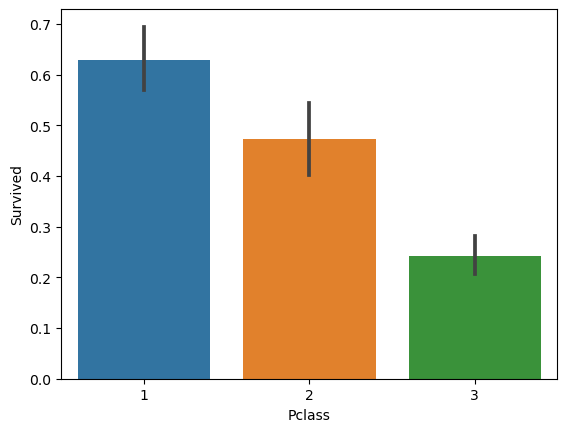

In [9]:
sns.barplot(x='Pclass', y='Survived', data=train_set)

In [10]:
train_set.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [11]:
train_set.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [12]:
train_set.groupby('Survived')['Parch'].mean()

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

In [13]:
train_set.groupby('Survived')['SibSp'].mean()

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

In [14]:
train_set.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

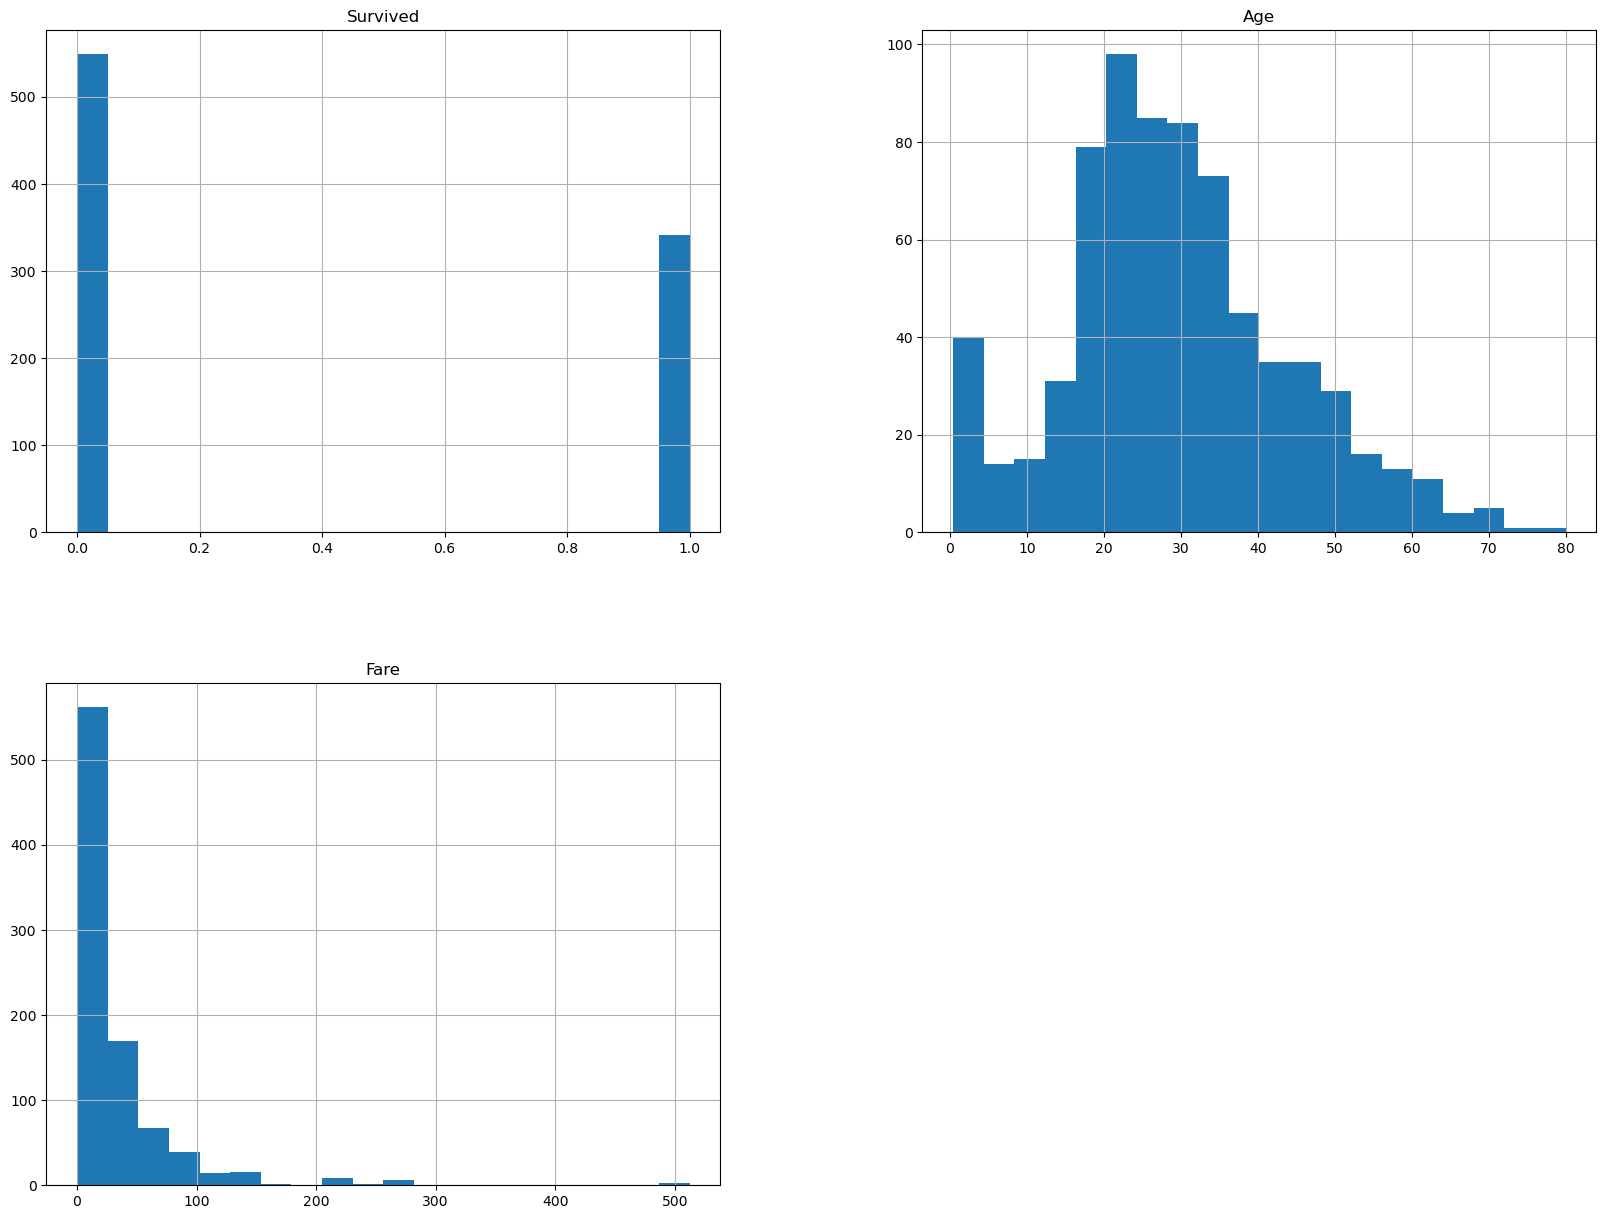

In [12]:
train_set.hist(figsize=(20,15), bins=20)

In [13]:
train_set['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [14]:
import re

In [15]:
marriage_stat = []
for i in train_set['Name']:
       x = re.search('\w+\.', i)
       marriage_stat.append(x.group())

In [16]:
train_set['title'] = marriage_stat
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [17]:
train_set.groupby('title')['Survived'].value_counts()

title      Survived
Capt.      0             1
Col.       0             1
           1             1
Countess.  1             1
Don.       0             1
Dr.        0             4
           1             3
Jonkheer.  0             1
Lady.      1             1
Major.     0             1
           1             1
Master.    1            23
           0            17
Miss.      1           127
           0            55
Mlle.      1             2
Mme.       1             1
Mr.        0           436
           1            81
Mrs.       1            99
           0            26
Ms.        1             1
Rev.       0             6
Sir.       1             1
Name: Survived, dtype: int64

In [18]:
train_set['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: title, dtype: int64

In [19]:
replace_dict = {'Capt.': 'Rare' ,'Col.' : 'Rare' , 'Countess.' : 'Rare' , 'Don.': 'Rare' , 'Jonkheer.' : 'Rare' , 'Mme.' : 'Rare' , 'Lady' : 'Rare' , 
                'Sir.' : 'Rare' , 'Ms.' : 'Rare' , 'Major.' : 'Rare' ,  'Mlle.' : 'Rare' ,  'Rev.' : 'Rare' , 'Dr.' : 'Rare', 'Lady.' : 'Rare'}

In [20]:
train_set['title'] = train_set['title'].replace(replace_dict)

In [21]:
train_set['title'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Rare        27
Name: title, dtype: int64

In [22]:
train_set.groupby('title')['Survived'].mean()

title
Master.    0.575000
Miss.      0.697802
Mr.        0.156673
Mrs.       0.792000
Rare       0.444444
Name: Survived, dtype: float64

In [23]:
data_corr = train_set.corr()

/tmp/ipykernel_456/1636708364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = train_set.corr()


In [24]:
data_corr['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Age        -0.077221
Name: Survived, dtype: float64

<Axes: >

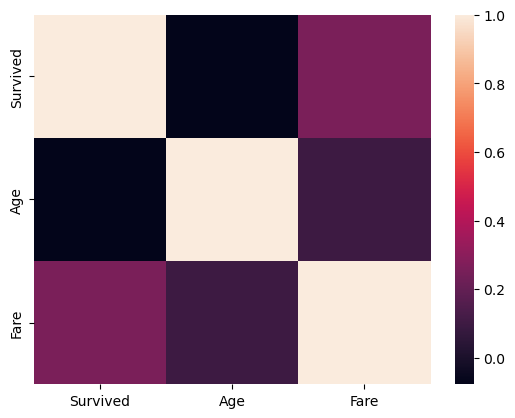

In [25]:
sns.heatmap(data_corr)

In [26]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    object 
 6   Parch     891 non-null    object 
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  title     891 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 90.5+ KB


In [27]:
X = train_set.drop(['Survived', 'Ticket', 'Cabin', 'Name'], axis=1)
y = train_set['Survived']

In [28]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Mr.
2,1,female,38.0,1,0,71.2833,C,Mrs.
3,3,female,26.0,0,0,7.9250,S,Miss.
4,1,female,35.0,1,0,53.1000,S,Mrs.
5,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S,Rare
888,1,female,19.0,0,0,30.0000,S,Miss.
889,3,female,NaN,1,2,23.4500,S,Miss.


In [29]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Mr.
2,1,female,38.0,1,0,71.2833,C,Mrs.
3,3,female,26.0,0,0,7.9250,S,Miss.
4,1,female,35.0,1,0,53.1000,S,Mrs.
5,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S,Rare
888,1,female,19.0,0,0,30.0000,S,Miss.
889,3,female,NaN,1,2,23.4500,S,Miss.


In [32]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
title         0
dtype: int64

In [33]:
num_attribs = ['Age', "Fare"]
cat_attribs = ['Pclass', 'Sex', 'SibSp', 'Parch', "Embarked", 'title']

In [34]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [35]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [36]:
X_prepared = full_pipeline.fit_transform(X)

In [37]:
X_prepared.toarray()

array([[-0.56573646, -0.50244517,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.66386103,  0.78684529,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.48885426,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.1046374 , -0.17626324,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.04438104,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.49237783,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [38]:
pd.DataFrame(X_prepared.toarray()).isna().any().sum()

0

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
def model_report(model, index, X = X_prepared):
    accuracy_score =cross_val_score(model, X, y, cv=10, scoring='accuracy')
    precision_score = cross_val_score(model, X, y, cv=10, scoring='precision')
    recall_score = cross_val_score(model, X, y, cv=10, scoring='recall')
    return pd.DataFrame({'accuracy' : np.mean(accuracy_score), 'precision' : np.mean(precision_score), 'recall' : np.mean(recall_score)}, index=[index])

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg = LogisticRegression()
log_reg_score = model_report(log_reg, 'Logistic_Regression')
log_reg_score

,accuracy,precision,recall
Logistic_Regression,0.82382,0.784629,0.748403


Linear SVC

In [43]:
from sklearn.svm import LinearSVC

In [45]:
linear_svc = LinearSVC()
linear_svc_score = model_report(linear_svc, 'Linear_SVC')
linear_svc_score

,accuracy,precision,recall
Linear_SVC,0.827154,0.79662,0.736639


SVC

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC()
svc_score = model_report(svc, 'SVC')
svc_score

,accuracy,precision,recall
SVC,0.827154,0.82894,0.692773


Decsion tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree = DecisionTreeClassifier()
tree_score = model_report(tree, 'Decision_Tree')
tree_score

,accuracy,precision,recall
Decision_Tree,0.783433,0.709759,0.730924


Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest = RandomForestClassifier()
forest_score = model_report(forest, 'Random_Forest')
forest_score

,accuracy,precision,recall
Random_Forest,0.799201,0.748809,0.716471


KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier()
knn_score = model_report(knn, 'KNN')
knn_score

,accuracy,precision,recall
KNN,0.815993,0.784323,0.722269


Gaussian NB

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
NB = GaussianNB()
NB_score = model_report(model = NB, index='Naive_Bayes', X = X_prepared.toarray())
NB_score

,accuracy,precision,recall
Naive_Bayes,0.414132,0.394635,0.985462


In [56]:
model_results = pd.concat([log_reg_score, linear_svc_score, svc_score, tree_score, forest_score, knn_score, NB_score], axis=0)
model_results

,accuracy,precision,recall
Logistic_Regression,0.823820,0.784629,0.748403
Linear_SVC,0.827154,0.796620,0.736639
SVC,0.827154,0.828940,0.692773
Decision_Tree,0.783433,0.709759,0.730924
Random_Forest,0.799201,0.748809,0.716471
KNN,0.815993,0.784323,0.722269
Naive_Bayes,0.414132,0.394635,0.985462


Logistic Regression - tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', None],
     'C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
     'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    
    }
]

In [59]:
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=10, scoring='accuracy', return_train_score=True, verbose=True)
grid_search.fit(X_prepared, y)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          'penalty': ['l1', 'l2', 'elasticnet', None],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [60]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LogisticRegression(C=1)
0.8238202247191012


In [61]:
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=10, scoring='precision', return_train_score=True, verbose=False)
grid_search.fit(X_prepared, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          'penalty': ['l1', 'l2', 'elasticnet', None],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             return_train_score=True, scoring='precision', verbose=False)

In [62]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LogisticRegression(C=0.9)
0.7861750778237345


In [63]:
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv=10, scoring='recall', return_train_score=True, verbose=False)
grid_search.fit(X_prepared, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          'penalty': ['l1', 'l2', 'elasticnet', None],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             return_train_score=True, scoring='recall', verbose=False)

In [64]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LogisticRegression(C=0.1, penalty=None, solver='newton-cg')
0.7484033613445378


In [65]:
param_grid = [
    {'C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
     'loss' : ['hinge', 'squared_hinge'],
     'penalty': ['l1', 'l2']}
]

In [66]:
linear_svc = LinearSVC()
grid_search = GridSearchCV(linear_svc, param_grid=param_grid, cv=10, scoring='recall', return_train_score=True, verbose=False)
grid_search.fit(X_prepared, y)


GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                          'loss': ['hinge', 'squared_hinge'],
                          'penalty': ['l1', 'l2']}],
             return_train_score=True, scoring='recall', verbose=False)

In [67]:
model_results

,accuracy,precision,recall
Logistic_Regression,0.823820,0.784629,0.748403
Linear_SVC,0.827154,0.796620,0.736639
SVC,0.827154,0.828940,0.692773
Decision_Tree,0.783433,0.709759,0.730924
Random_Forest,0.799201,0.748809,0.716471
KNN,0.815993,0.784323,0.722269
Naive_Bayes,0.414132,0.394635,0.985462


In [68]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LinearSVC(C=0.1)
0.7366386554621849


In [69]:
param_dist = [
    {'C' : np.linspace(0.5, 0.8, 10000),
     'loss' : ['hinge', 'squared_hinge'],
     'penalty': ['l1', 'l2']}
]

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
linear_svc = LinearSVC()
randomized_search = RandomizedSearchCV(linear_svc, param_distributions=param_dist, cv=10, scoring='accuracy',return_train_score=True, verbose=False)
randomized_search.fit(X_prepared, y)

RandomizedSearchCV(cv=10, estimator=LinearSVC(),
                   param_distributions=[{'C': array([0.5       , 0.50003   , 0.50006001, ..., 0.79993999, 0.79997   ,
       0.8       ]),
                                         'loss': ['hinge', 'squared_hinge'],
                                         'penalty': ['l1', 'l2']}],
                   return_train_score=True, scoring='accuracy', verbose=False)

In [72]:
print(randomized_search.best_estimator_)
print(randomized_search.best_score_)

LinearSVC(C=0.7914491449144915)
0.8249063670411985


LinearSVC(C=0.7993399339933993, loss='hinge')
0.8260299625468164

LinearSVC(C=0.7440444044404441, loss='hinge')
0.8029913722209127

In [73]:
final_model = randomized_search.best_estimator_

In [97]:
test_set = pd.read_csv('test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
test_set = test_set.set_index('PassengerId')
test_set

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [99]:
test_set['Pclass'] = test_set['Pclass'].astype('object')
test_set['SibSp'] = test_set['SibSp'].astype('object')
test_set['Parch'] = test_set['Parch'].astype('object')

In [100]:
marriage_stat = []
for i in test_set['Name']:
       x = re.search('\w+\.', i)
       marriage_stat.append(x.group())

In [101]:
test_set['title'] = marriage_stat
test_set


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr.
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona.
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.


In [102]:
train_set['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [103]:
test_set['Parch'] = test_set['Parch'].apply(lambda x: 6 if x > 6 else x)

In [104]:
test_set['Parch'].value_counts()

0    324
1     52
2     33
3      3
6      3
4      2
5      1
Name: Parch, dtype: int64

In [105]:
test_set['title'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: title, dtype: int64

In [106]:
rename_dict = {'Col.' : 'Rare', 'Rev.' : 'Rare', 'Ms.' : "Rare", "Dr." : 'Rare', 'Dona.' : 'Rare'}
test_set['title'] = test_set['title'].replace(rename_dict)


In [107]:
test_set['title'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Rare         7
Name: title, dtype: int64

In [108]:
test_set

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr.
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.


In [109]:
test_set['Parch'] = test_set['Parch'].astype('object')

In [110]:
X_test = test_set.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [111]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,Mr.
893,3,female,47.0,1,0,7.0000,S,Mrs.
894,2,male,62.0,0,0,9.6875,Q,Mr.
895,3,male,27.0,0,0,8.6625,S,Mr.
896,3,female,22.0,1,1,12.2875,S,Mrs.
...,...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S,Mr.
1306,1,female,39.0,0,0,108.9000,C,Rare
1307,3,male,38.5,0,0,7.2500,S,Mr.


In [112]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    object 
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    object 
 4   Parch     418 non-null    object 
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   title     418 non-null    object 
dtypes: float64(2), object(6)
memory usage: 29.4+ KB


In [113]:
X_test_prepared = full_pipeline.transform(X_test)

In [114]:
X_test_prepared

<418x30 sparse matrix of type '<class 'numpy.float64'>'
	with 3344 stored elements in Compressed Sparse Row format>

In [115]:
y_pred = final_model.predict(X_test_prepared)

In [116]:
y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=['Survived'])
y_pred_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [425]:
y_pred_df.to_csv('prediction.csv')